In [1]:
# import csv

# filename = 'MolGen.csv'
# with open(filename, 'r') as csvfile:
#     reader = csv.DictReader(csvfile)
#     rows = [row for row in reader]


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
import requests
import csv
from io import StringIO

def fetch_google_sheet_data_as_dicts(url):
    response = requests.get(url)
    assert response.status_code == 200, 'Failed to fetch the CSV data'
    
    csv_data = StringIO(response.text)
    reader = csv.DictReader(csv_data)
    return [row for row in reader]

In [4]:
# The link you got from the publish step
r = random.randint(1,100000)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-1vS6lVqvtxU0md0PqNN8MvKEcWD3YB4mwkN4sJAUP5ttj6yNdhP7xB6p0rwWI8yaKBmOuWx1zVuSiDQJ/pub?gid=846390475&single=true&output=csv&tm={r}'
rows = fetch_google_sheet_data_as_dicts(url)


In [5]:
N = {
    '800K': 800_000,
    '85M': 85_000_000,
    '302M': 302_000_000,
    '680M': 680_000_000,
    '1.2B': 1_200_000_000
}
subsets = ['aspirin_0.4', 'sas_3', 'druglike_0.4']
S = {
    'aspirin_0.4': 8_284_280,
    'sas_3': 6_645_440,
    'druglike_0.4': 6000000
}

In [7]:
D = [4000, 16000, 64000, 256000, 1000000]
X = [10**3, 10**4, 10**5, 10**6, 10**7]



In [8]:
lines = {
    s: {n:[] for n in N.keys()}
    for s in subsets
}

generated = {
    s: {
        n: {
            d: [] for d in D
        } 
        for n in N.keys()
    }
    for s in subsets
}

generated_flat = {
    s: {
        "N": [],
        "X": [],
        "recall": [],
        "ppl": [],
    }
    for s in subsets
}

for r in rows:
    if (r['laws'] != "chinchilla"):
        continue
    if r['test ppl'] == '':
        continue
    lines[r['dataset']][r['model size']].append([
        int(r['data size']),
        float(r['test ppl'])
    ])
    if r['1000'] != '':
        for x in X:
            generated[r['dataset']][r['model size']][int(r['data size'])].append([
                x, int(r[f'{x}']), float(r['test ppl'])
            ])
            if x == 1000:
                continue
            generated_flat[r['dataset']]["N"].append(N[r['model size']])
            generated_flat[r['dataset']]["X"].append(x)
            generated_flat[r['dataset']]["recall"].append(int(r[f'{x}']))
            generated_flat[r['dataset']]["ppl"].append(float(r['test ppl']))
        
#     d = 
    

In [9]:
generated

{'aspirin_0.4': {'800K': {4000: [],
   16000: [],
   64000: [],
   256000: [],
   1000000: [[1000, 563, 2.045],
    [10000, 5824, 2.045],
    [100000, 57896, 2.045],
    [1000000, 545668, 2.045],
    [10000000, 3452550, 2.045]]},
  '85M': {4000: [],
   16000: [],
   64000: [],
   256000: [],
   1000000: [[1000, 736, 1.996],
    [10000, 7217, 1.996],
    [100000, 71297, 1.996],
    [1000000, 673279, 1.996],
    [10000000, 4195796, 1.996]]},
  '302M': {4000: [],
   16000: [],
   64000: [],
   256000: [],
   1000000: [[1000, 778, 1.995],
    [10000, 7767, 1.995],
    [100000, 76501, 1.995],
    [1000000, 719854, 1.995],
    [10000000, 4334935, 1.995]]},
  '680M': {4000: [],
   16000: [],
   64000: [],
   256000: [],
   1000000: [[1000, 755, 1.996],
    [10000, 7633, 1.996],
    [100000, 76038, 1.996],
    [1000000, 713141, 1.996],
    [10000000, 4309672, 1.996]]},
  '1.2B': {4000: [],
   16000: [],
   64000: [],
   256000: [],
   1000000: [[1000, 776, 2.001],
    [10000, 7883, 2.001],
   

In [12]:
N_range = 10**(np.arange(5,11))

In [13]:
N_range

array([     100000,     1000000,    10000000,   100000000,  1000000000,
       10000000000])

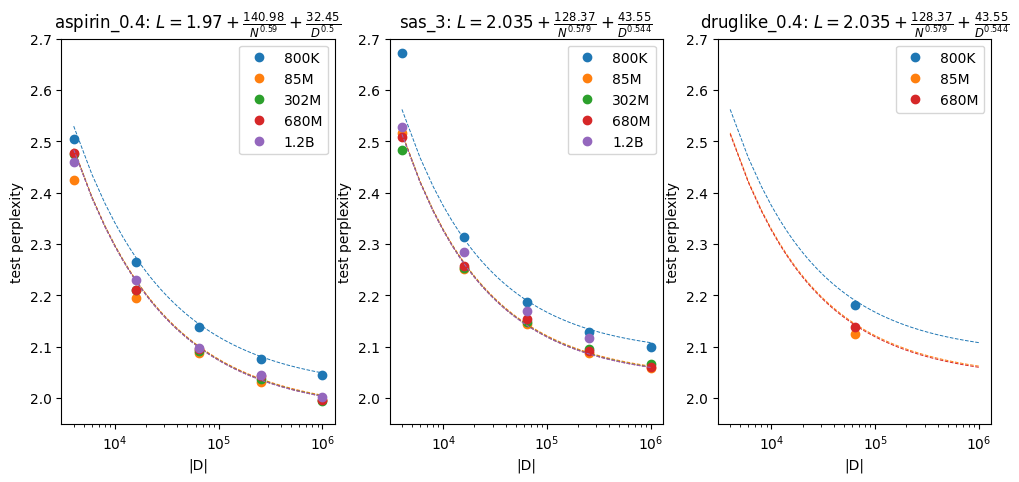

In [14]:
fig, ax = plt.subplots(1, len(lines), figsize=(12,5))

params = {
    'aspirin_0.4': [1.97, 140.98, 0.59, 32.45, 0.5],
    'sas_3': [2.035, 128.37, 0.579, 43.55, 0.544],
    'druglike_0.4': [2.035, 128.37, 0.579, 43.55, 0.544],
}

for si, s in enumerate(subsets):
    for i, (key, values) in enumerate(lines[s].items()):
        if len(values) == 0:
            continue
        ax[si].plot(np.array(values).T[0], np.array(values).T[1], linewidth=0, marker='o', label=key, color=f"C{i}")
        xrange = np.arange(4000, 1_000_000, 2000)
        
        e, a, alpha, b, beta = params[s]
        L = e + a/(N[key]**alpha) + b/(xrange**beta)
        
        ax[si].plot(xrange, L, color=f"C{i}", linestyle='dashed', linewidth=0.7)
    ax[si].title.set_text(f"{s}: $L={e} + \\frac{{{a}}}{{N^{{{alpha}}}}} + \\frac{{{b}}}{{D^{{{beta}}}}}$")


#     for n in N_range:    
#         xrange = np.arange(10000, 50_000_000, 10000)
#         L = 1.97 + 140.98/(n**0.59) + 32.45/(xrange**0.5)
#         ax[si].plot(xrange, L, color='black', linestyle='dashed', linewidth=0.3)
        
    ax[si].legend()
    s
#     ax[si].set_yscale('log')
    ax[si].set_xlabel('|D|')
    ax[si].set_ylim(1.95, 2.7)
    ax[si].set_ylabel("test perplexity")

In [145]:
# N = np.array([     4000,      16000,     64000,     256000,    1000000,   1000000,  1000000,   1000000,    1000000])
# D = np.array([     680000000, 680000000, 680000000, 680000000, 680000000, 85000000, 302000000, 1200000000, 800000])
# y_true = np.array([7.957,     4.123,     2.759,     2.188,     2.031,     2.1,      2.058,     2.019,      2.093])

# a = 4.992285251617432
# b = 4.999780178070068
# e = -0.969689667224884
# alpha = 0.46242573857307434
# beta = 0.499180406332016

In [162]:
import torch
from torch.autograd import Variable
from torch.optim import LBFGS

In [115]:
# Define the Huber loss function
def huber_loss(y_true, y_pred, delta=0.001):
    error = torch.abs(y_true - y_pred)
    quadratic_loss = 0.5 * error**2
    linear_loss = delta * (error - 0.5 * delta)
    loss = torch.where(error <= delta, quadratic_loss, linear_loss)
    return loss.sum()

In [ ]:
# exp(E + A/N^alpha + B/D^beta)

In [113]:
def lbfgs(N, D, y_true, lr, delta, a = 5., b = 5., e = -1., alpha = 0.5, beta = 0.5):
  alpha = Variable(torch.tensor(alpha), requires_grad=True)
  beta = Variable(torch.tensor(beta), requires_grad=True)
  e = Variable(torch.tensor(e), requires_grad=True)
  a = Variable(torch.tensor(a), requires_grad=True)
  b = Variable(torch.tensor(b), requires_grad=True)
  # Create a list of parameters to optimize
  parameters = [alpha, beta, e, a, b]
  size = N.shape[0]
  # Create a closure function for the L-BFGS optimizer
  def closure():
      loss = 0
      optimizer.zero_grad()
      for i in range(size):
        log_pred = torch.stack((a - alpha*torch.log(N[i]), b - beta*torch.log(D[i]), e))
        lse_log_pred = torch.logsumexp(log_pred,0)
        loss += huber_loss(torch.log(y_true[i]), lse_log_pred, delta)
      loss.backward()
      return loss
  # Initialize the L-BFGS optimizer
  optimizer = LBFGS(parameters, lr)
  # Optimization loop
  for i in range(10):  # You can adjust the number of iterations
      loss = optimizer.step(closure)
  return loss,a, b, e, alpha, beta, delta, lr

In [348]:
def lbfgs_gen(N, X, recall, ppl, s, lr, delta, a = 5., b = 5., e = -1., alpha = 0.5, beta = 0.5):
  E = Variable(torch.tensor(e), requires_grad=True)
  A = Variable(torch.tensor(a), requires_grad=True)
  alpha = Variable(torch.tensor(alpha), requires_grad=True)
  # Create a list of parameters to optimize
  parameters = [E, A, alpha]

  # Create a closure function for the L-BFGS optimizer
  def closure():
      loss = 0
      optimizer.zero_grad()
      for i in range(len(N)):
        log_pred = torch.exp(-(A / (N[i]**alpha)) -ppl[i] + E)
#         lse_log_pred = torch.logsumexp(log_pred,0)

        loss += huber_loss(
            torch.tensor(recall[i] / (s*(1-(1-1/s)**X[i]))), 
            log_pred, delta
        )
      loss.backward()
      return loss
  # Initialize the L-BFGS optimizer
  optimizer = LBFGS(parameters, lr)
  # Optimization loop
  for i in range(30):  # You can adjust the number of iterations
    loss = optimizer.step(closure)
    print(f"loss={loss.item():.3f}, A={(A.item()):.3f}, E={(E.item()):.3f}, alpha={alpha.item():.3f}")
  return loss, A.item(), b, E.item(), alpha.item(), beta, delta, lr

In [412]:
s = 'aspirin_0.4'


loss,a, b, e, alpha, beta, delta, lr = lbfgs_gen(
    N = generated_flat[s]['N'],
    X = generated_flat[s]['X'],
    recall = generated_flat[s]['recall'],
    ppl = generated_flat[s]['ppl'],
    s = S[s],
    lr = 0.015,
    delta = 0.01,
    e = 2.0
)

loss=0.054, A=5.001, E=1.747, alpha=0.404
loss=0.009, A=5.005, E=1.683, alpha=0.109
loss=0.069, A=5.004, E=1.692, alpha=0.144
loss=0.041, A=5.003, E=1.702, alpha=0.170
loss=0.026, A=5.001, E=1.716, alpha=0.196
loss=0.014, A=4.999, E=1.732, alpha=0.223
loss=0.005, A=4.999, E=1.736, alpha=0.226
loss=0.004, A=4.999, E=1.744, alpha=0.226
loss=0.003, A=5.000, E=1.755, alpha=0.223
loss=0.002, A=5.000, E=1.764, alpha=0.220
loss=0.002, A=5.000, E=1.770, alpha=0.217
loss=0.002, A=5.001, E=1.778, alpha=0.215
loss=0.002, A=5.001, E=1.782, alpha=0.213
loss=0.002, A=5.001, E=1.786, alpha=0.212
loss=0.002, A=5.001, E=1.789, alpha=0.211
loss=0.002, A=5.001, E=1.791, alpha=0.211
loss=0.002, A=5.001, E=1.792, alpha=0.210
loss=0.002, A=5.000, E=1.794, alpha=0.210
loss=0.002, A=5.000, E=1.794, alpha=0.209
loss=0.002, A=5.000, E=1.795, alpha=0.209
loss=0.002, A=4.999, E=1.796, alpha=0.209
loss=0.002, A=4.999, E=1.796, alpha=0.209
loss=0.002, A=4.998, E=1.796, alpha=0.209
loss=0.002, A=4.998, E=1.796, alph

In [355]:
generated_flat[s]['X']

[10000,
 100000,
 1000000,
 10000000,
 10000,
 100000,
 1000000,
 10000000,
 10000,
 100000,
 1000000,
 10000000,
 10000,
 100000,
 1000000,
 10000000,
 10000,
 100000,
 1000000,
 10000000]

Text(0.5, 0, 'x = number of generated samples')

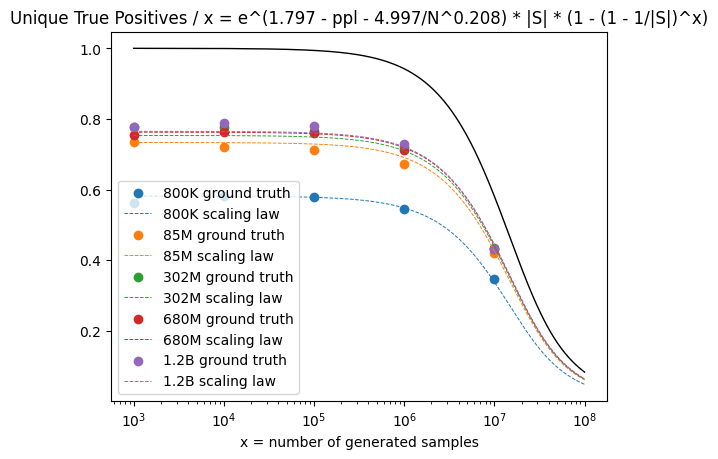

In [413]:
plt.figure()

s = 'aspirin_0.4'

xrange = np.arange(1000, 10**8, 10000)

upper = S[s] * (1 - (1 - 1/S[s])**xrange)

for n in N.keys():
    z = np.array(generated[s][n][1000000])
    plt.scatter(z[:,0], z[:,1] / z[:,0], label=f"{n} ground truth") # 
    
    R = upper * np.exp(e - z[0,2] - a / (N[n]**alpha))
    plt.plot(xrange, R / xrange, label=f"{n} scaling law", linestyle='dashed', linewidth=0.7) # 
    
    
plt.plot(xrange, upper / xrange, color='black', linewidth=1) # 
# plt.plot([xrange[0], xrange[-1]], [S[s], S[s]], color='black', linewidth=0.3)

plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.title(f"Unique True Positives / x = e^({e:.3f} - ppl - {a:.3f}/N^{alpha:.3f}) * |S| * (1 - (1 - 1/|S|)^x)")
plt.xlabel("x = number of generated samples")

Text(0.5, 0, 'x = number of generated samples')

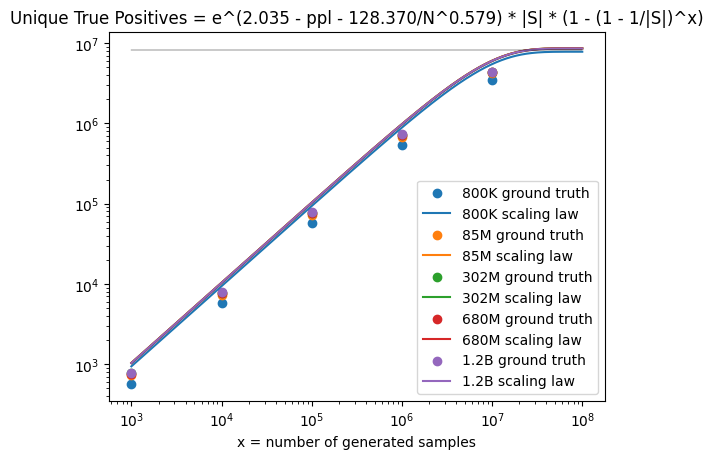

In [411]:
plt.figure()

s = 'aspirin_0.4'

xrange = np.arange(1000, 10**8, 10000)

upper = S[s] * (1 - (1 - 1/S[s])**xrange)

for n in N.keys():
    z = np.array(generated[s][n][1000000])
    plt.scatter(z[:,0], z[:,1] , label=f"{n} ground truth") # / z[:,0],
    
    R = upper * np.exp(e - z[0,2] - a / (N[n]**alpha))
    plt.plot(xrange, R, label=f"{n} scaling law") #  / xrange
    
    
plt.plot(xrange, upper, color='black', linewidth=0.1) #  / xrange
plt.plot([xrange[0], xrange[-1]], [S[s], S[s]], color='black', linewidth=0.3)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(f"Unique True Positives = e^({e:.3f} - ppl - {a:.3f}/N^{alpha:.3f}) * |S| * (1 - (1 - 1/|S|)^x)")
plt.xlabel("x = number of generated samples")

In [299]:
upper[-1]  * np.exp(e - z[0,2] - a / (N[n]**alpha))

6354852.23297775

In [375]:
S[s] * (1 - (1-1/S[s])**x)

942001.7318743091

In [380]:
cache = {}
def get_sum(lam = 0.000001):
    if lam in cache:
        return cache[lam]
    x = 1000000
    sum_ = 0
    for i in tqdm(range(S[s])):
        sum_ += 1 - (1-lam * np.exp(-lam*i))**x
    cache[lam] = sum_
    return cache[lam]

In [381]:
get_sum(0.000001)

  0%|          | 0/8284280 [00:00<?, ?it/s]

796347.608904577

In [382]:
get_sum(0.000002)

  0%|          | 0/8284280 [00:00<?, ?it/s]

659632.1951825476

In [383]:
get_sum(0.0000015)

  0%|          | 0/8284280 [00:00<?, ?it/s]

721796.7615734412

In [384]:
    sum_ = 0
    for i in tqdm(range(S[s])):
        sum_ += lam * np.exp(-lam*i)

  0%|          | 0/8284280 [00:00<?, ?it/s]

In [385]:
sum_

-0.9997480454942658